In [5]:
import math,re
import nltk
from collections import Counter
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [6]:
WORD = re.compile(r'\w+')

def drawgraph(mat):
    num=len(mat)
    x=range(1,num+1)
    plt.plot(x,mat)
    plt.xlabel("sentence position")
    plt.ylabel("score")
    plt.show()


def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)


def thematic_word(wordstring):
    wordlist = wordstring.split()
    wordfreq = [wordlist.count(w) for w in wordlist] # a list comprehension
    lp=dict(zip(wordlist,wordfreq))
    from collections import OrderedDict
    new=OrderedDict(sorted(lp.items(),key=lambda x:x[1],reverse=True)[:10])
    listof=list()
    for i in new:
        listof.append(i)
    lines=wordstring.split('.')
    while '' in lines:
        lines.remove('')
    temper=list()
    for i in lines:
        templist=i.split()
        list3=set(listof)&set(templist)
        temper.append(len(list3))
    return temper  
    
#score on the basis of sentence position
def sentence_position(wordstring):
    import math
    para=wordstring.split('.')
    while '' in para:
        para.remove('')
    n=len(para)
    th=0.2*n
    minimum=th*n
    maximum=th*2*n
    length=len(para)
    relativepara=list()
    relativepara.append(1)

    #if to add last full stop take length-2
    for i in range(1,length-1):
        x=i+1-minimum
        y=(1/maximum)-minimum
        z=math.cos(x*y)
        relativepara.append(z)
    
    relativepara.append(1)
    return relativepara 
    
#score on the basis of sentence length
def sentence_length(wordstring):
    listcount=list()
    linesplit=wordstring.split('.')
    while '' in linesplit:
        linesplit.remove('')
    for i in linesplit:
        words=i.split()
        t=len(words)
        listcount.append(t)
    return listcount
    
#score on the basis of sentence position in a paragraph
def sentence_position_paragraph(wordstring):
    multiplepara=wordstring.split('\n\n')
    relativepara=list()
    for j in multiplepara:
        para=j.split('.')
        while '' in para:
            para.remove('')
        #para = filter(None, para)
        length=len(para)
        relativepara.append(1)
        for i in range(1,length-1):
            relativepara.append(0)
        relativepara.append(1)
    return relativepara
    
#score on the basis of number of proper nouns
def proper_nouns(wordstring):
    from nltk.tag import pos_tag
    var=list()
    sentences=wordstring.split('.')
    while '' in sentences:
        sentences.remove('')
    for i in sentences:
        tagged_sent = pos_tag(i.split())
        propernouns = [word for word,pos in tagged_sent if pos == 'NNP']
        var.append(len(propernouns))
    return var
    
#higher preference to the sentence having numerals
def number_count(wordstring):
    countlist=list()
    lines=wordstring.split('.')
    while '' in lines:
        lines.remove('')
    for i in lines:
        l1=[int(s) for s in i.split() if s.isdigit()]
        l2=i.split()
        num1=float(len(l1))
        num2=float(len(l2))
        if num2!=0:
            ration=float(num1/num2)
        else:
            ration=0
        countlist.append(ration)
    return countlist
    
def tfisf(wordstring):
    wordlist = wordstring.split()

    wordfreq = [wordlist.count(w) for w in wordlist] # a list comprehension

    lp=dict(zip(wordlist,wordfreq))
    #lp=tftq
    c=wordstring.split('.')
    while '' in c:
        c.remove('')
    ##print(c)
    sentence=dict()
    for i in lp:
        m=wordstring.split('.')
        while '' in m:
            m.remove('')
        count=0
        for j in m:
            wordset=j.split()
            if i in wordset:
                count+=1
        sentence[i]=count     
    #sft=sentence
    ##print sentence
    varr=list()    
    cc=wordstring.split('.') 
    while '' in cc:
        cc.remove('')
    #n
    n=len(cc)
    for we in cc:
        mm=dict()
        ab=we.split(' ')
        for ad in ab:
            mm[ad]=mm.get(ad,0)+1
        counter=0
        for i in mm:
            counter=counter+math.log(lp.get(i,0)+1)*math.log(mm.get(i,0)+1)*math.log((n+1)/(0.5+sentence.get(i,0)))
        varr.append(counter)
    return varr
    
def cosine_sim(wordstring,pos):
    sentence=wordstring.split('.')
    while '' in sentence:
        sentence.remove('')
    cosine=list()
    for i in sentence:
        vector1 = text_to_vector(i)
        vector2 = text_to_vector(sentence[pos])
        cosine.append(get_cosine(vector1, vector2))
    return cosine
def normalize(matrix):
    minim=min(matrix)
    maxim=max(matrix)
    for i in range(len(matrix)):
        matrix[i]=(matrix[i]-minim)/(maxim-minim)
    return matrix

In [7]:
wordstring="""
Economic liberalization means abolition of controls in industry and commerce by delicensing, reduction in custom duties and opening the doors for foreign investment in the country. It is agreed by Economists that economic liberalization results in a growth boost of atleast 20 percent in three years. Dismantling of controls is expected to boost industrial production and revive the economy. The past few Union governments in India have been considering liberalisation favourably in view of the dazzling performance of some Asian countries who liberalised their economies during the last two decades. Some of our neighbouring countries like Indonesia, Malaysia, Thailand and China have registered substantial economic growth due to liberalisation and marketisation of their economies. If India is not to lag far behind these countries, our economists think that we, too, should unshackle our economy from debilitating controls and allow the free interplay of market forces to give incentive to the enterprising entrepreneurs and to attract substantial foreign investment. First three decades after Independence had witnessed increasing investment in public sector enterprises engaged in production of oil, steel, coal, power, cloth, and fertilizer, electrical and electronic goods. While very few of them, having administered prices, have performed well and earned profits, overall return from the public sector units involving a very huge portion of plan investments has been extra ordinary low or unprofitable.
They are also not run on sound commercial lines and are overstaffed. It is felt that a number of measures can be initiated to revamp the public sector undertakings by making them compete with private sector units and by overhauling their management systems. Part of the public sector equity can be disinvested for mobilisation of resources to reduce fiscal deficit. Disinvestment in oil sector and telecom sector has already been made although funds received are not as per the expectations. Disinvestment in public sector units will be further increased in coming years reducing government share and increasing private share over a period of time. By allowing private sector investors to participate in power, mining and telecom sector, a very substantial and fast upgradation of economic infrastructure can be brought about in a few years. Moreover, the public sector units will learn to contain their expenditure, to increase their competitive skills and enter into healthy competition with private entrepreneurs.
This level playing field for all the players - both private sector and public sector organisations - will encourage healthy competition improving the performance of both and adding to the country's pool of goods and services. Administered prices will be slowly phased out in favour of market prices. The quality of goods and services will improve and the consumer will have greater choice and buy at competitive prices.  The opponents of economic liberalisation allege that the small Indian entrepreneurs will not be able to compete with big multinational companies if the latter start setting up industries which had so long been reserved for small scale industries. The small units have to acquire sophisticated equipment and expert specialist engineers and managers, it is doubtful if they will be able to mobilise resources for such equipment and employees.
Economic liberalization also means unrestricted entry and marketing of seeds and other patented inputs of M.N.C.s throughout the country. The Govt, of India have to sign the relevant agreement of World Trade Organisation to facilitate protection of patent rights of foreign companies. Acceptance of W.T.O. terms will lead to higher cost of many agricultural inputs but also a considerable enhancement in productivity and production. The most visible aspect of liberalisation in the country's economy will be a much larger presence of multinational companies in the field not only of infrastructure, power or telecom but also in consumer industry, potato chips, cold drinks, toys and a large variety of consumer goods. The opponents of liberalisation fear that the entry of M.N.C.s in the market will unnerve the local industrialists as they may not be able to compete with them. Although this apprehension is not entirely ill-founded, a long term view in this matter will show the benefits of this policy.Foreign companies bring along with them the latest and better technology which will be imitated and adapted by Indian manufacturers with great profit. We have sufficient technical manpower in the country which is almost 2 times more than the other countries who is capable of adapting the very latest and the most advanced techniques and technologies. Advanced technologies coming in the wake of M.N.C.s will be learned, adopted and adapted by Indian companies. 
One important aspect of liberalization is the phasing out of subsidies which account for a substantial portion of government expenditure. Subsidy on foodgrains for below poverty line people has justification but on food grains distributed to above poverty line population, subsidies can be withdrawn without endangering the food security system. Most state electricity boards are running into losses of thousands of crores, as they continue to subsidize power supply to farmers as also to domestic consumers. As mostly better off farmers use power for energizing their tube-wells they can be given power at commercial rates. Populism and politics of vote bank prevent ruling parties to withdraw subsidies on power and fertilizer. Amount saved through withdrawal of subsidies can be invested for higher generation of power as well as for building up the economic and social infrastructure. Non-merit subsidies should be withdrawn immediately. Other subsidies should be better targeted to give relief to the poor and the deserving. 
Liberalization is not of much value if the overall production of goods and services does not increase or larger employment opportunities are not created. Until the purchasing power of the people goes up, there will be no effective demand for goods and services and industrial activity and growth will not be stimulated. Large doses of government and private investment in creation of infrastructure - roads, ports, railways, housing, schools, power, irrigation and hospitals - will offer increased employment opportunities to people. They will get money to spend on consumer goods, education I and health services. The enhanced demand will lead to economic regeneration in agriculture, industry and services sector.  Civic facilities in India are in very poor shape. International aid agencies are ready to finance up gradation of civic facilities provided the Government and municipal bodies rationalize user-charges for water supply and electricity and earn sufficient revenue to maintain and expand their civic facilities. But most municipal bodies and state governments are reluctant to rationalize and increase the rates for civic facilities.
This results in gradual decay of the services and sometimes total breakdown of services. The constraint of funds with the state governments immobilizes them to take any initiative in this matter. Some of the progressive municipal bodies, notably of Ahmedabad, have overcome populist inhibitions and have decided to expand the civic services by raising money from the market and shifting the burden for maintenance of services to rationalized user-charges.  Power sector reforms have been put in place by setting up state regulatory commissions charged with the authority of fixing power tariff on commercial considerations. If implemented, these reforms will improve the working of state electricity boards, obviate losses and generate revenue for further generation of power, besides improving transmission and distribution of electricity.  Imports have been liberalized by bringing most items on open general license. This measure coupled with substantial reduction on import duties has led to encouraging results. Gold smuggling is now virtually non-existent and gold prices have fallen. Incidence of corrupt practices in customs department has gone down considerably.  Banking sector reforms are some of the most important features of liberalization. Banks have been given flexibility in respect of fixing lending rate, Non-performing Assets have been excluded from the calculation of banks liquidity and profitability, loans for purchase of consumer goods have been liberalised to improve bank's financial performance and also to generate greater demand for consumer goods which promote industrial activity.
"""

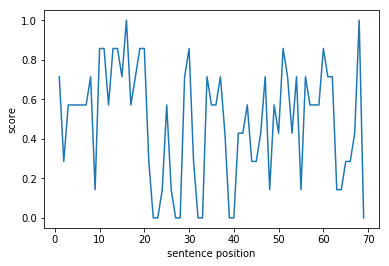

In [8]:
matrix1=thematic_word(wordstring)
sentences=wordstring.split('.')
while '' in sentences:
    sentences.remove('')
#print (sentences)    

matrix1=normalize(matrix1)

drawgraph(matrix1)


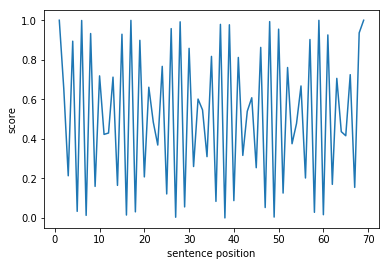

In [9]:
matrix2=sentence_position(wordstring)
matrix2=normalize(matrix2)

drawgraph(matrix2)

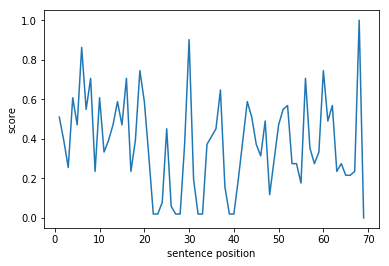

In [10]:

matrix3=sentence_length(wordstring)
matrix3=normalize(matrix3)

drawgraph(matrix3)

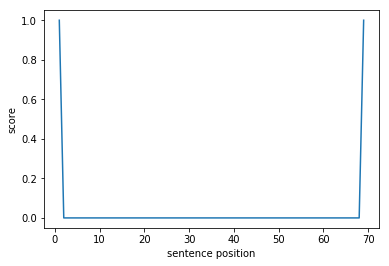

In [11]:
matrix4=sentence_position_paragraph(wordstring)
matrix4=normalize(matrix4)

drawgraph(matrix4)

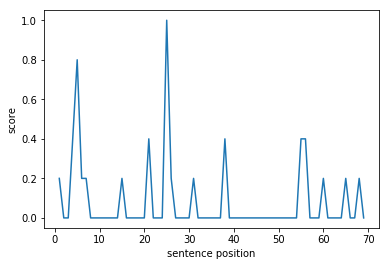

In [13]:
matrix5=proper_nouns(wordstring)
matrix5=normalize(matrix5)
drawgraph(matrix5)

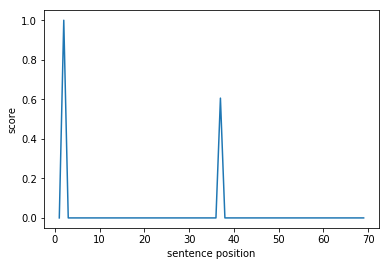

In [14]:

matrix6=number_count(wordstring)
matrix6=normalize(matrix6)

drawgraph(matrix6)

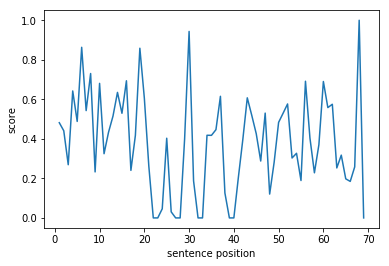

In [16]:
matrix7=tfisf(wordstring)

maxim=matrix7.index(max(matrix7))
matrix7=normalize(matrix7)
drawgraph(matrix7)

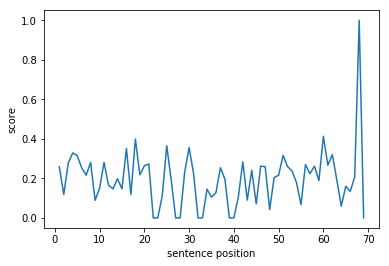

In [17]:
matrix8=cosine_sim(wordstring,maxim)
matrix8=normalize(matrix8)

drawgraph(matrix8)

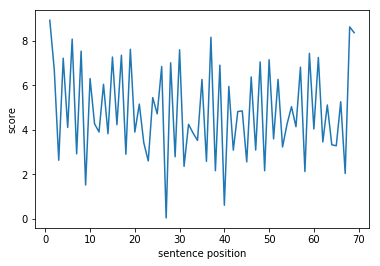

In [18]:
sentences=wordstring.split('.')
while '' in sentences:
    sentences.remove('')
finalscores=list()
for i in range(len(sentences)):
    t=10*matrix1[i]*matrix1[i]+50*matrix2[i]*matrix2[i]+5*matrix3[i]*matrix3[i]+20*matrix4[i]*matrix4[i]+15*matrix5[i]*matrix5[i]+20*matrix6[i]*matrix6[i]+10*matrix7[i]*matrix7[i]+5*matrix8[i]*matrix8[i]
    t=math.sqrt(t)
    finalscores.append(t)

drawgraph(finalscores)

In [23]:
length=math.ceil(len(sentences)/4)
#print('Final scores')
#print (finalscores)
finalsummary=' '

for i in range (length):
    cosine1=list()
    index1=list()
    if i==0 :    
        maxim=finalscores.index(max(finalscores))
        finalsummary+=sentences[maxim]
        finalsummary+='.'
        finalscores[maxim]=-1000
        comparing=sentences[maxim]
    else:
        for j in range(len(sentences)):
            if finalscores[j]>=0:
                vector1 = text_to_vector(sentences[j])
                vector2 = text_to_vector(comparing)
                cosine1.append(get_cosine(vector1, vector2))
                index1.append(j)
        maximum=cosine1.index(max(cosine1))
        actual_index=index1[maximum]
        comparing=sentences[actual_index]
        finalsummary+=comparing
        finalsummary+='.'
        finalscores[actual_index]=-1000
print(finalsummary)


2391
 
. It is agreed by Economists that economic liberalization results in a growth boost of atleast 20 percent in three years.  Civic facilities in India are in very poor shape. First three decades after Independence had witnessed increasing investment in public sector enterprises engaged in production of oil, steel, coal, power, cloth, and fertilizer, electrical and electronic goods. Populism and politics of vote bank prevent ruling parties to withdraw subsidies on power and fertilizer.
Economic liberalization also means unrestricted entry and marketing of seeds and other patented inputs of M. Some of our neighbouring countries like Indonesia, Malaysia, Thailand and China have registered substantial economic growth due to liberalisation and marketisation of their economies. Most state electricity boards are running into losses of thousands of crores, as they continue to subsidize power supply to farmers as also to domestic consumers. terms will lead to higher cost of many agricultur

In [27]:
print (len(finalsummary),len(wordstring))


2391 8653
